In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [165]:
def f1(x):
    return math.cos(x)*math.cosh(x) - 1

def f1_d(x):
    return math.cos(x)*math.sinh(x) - math.sin(x)*math.cosh(x)

def f2(x):
    return  1/x - math.tan(x)

def f2_d(x):
    return -1/pow(x, 2) - 1/pow(math.cos(x), 2)

def f3(x):
    return pow(2, -x) + math.exp(x) + 2*math.cos(x) - 6

def f3_d(x):
    return math.exp(x) - pow(2, -x)*math.log(2) - 2*math.sin(x)

In [166]:
def plot_function(left, right, f):
    x = np.linspace(left, right, 100)
    y = [f(x0) for x0 in x]
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('zero')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    # ax.set_ylim(10)

    plt.plot(x,y, color='r')

    plt.show()

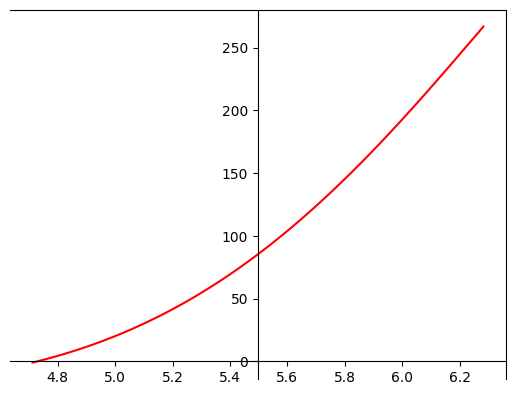

In [167]:
plot_function(math.pi*3/2, 2*math.pi, f1)

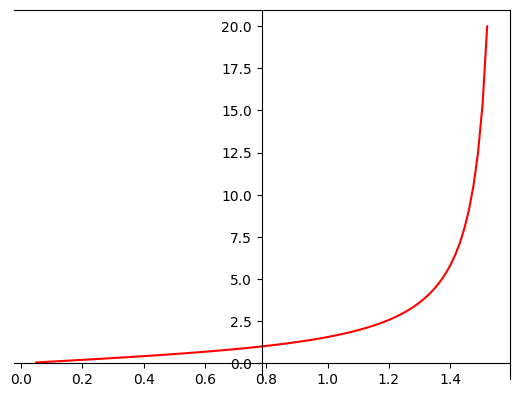

In [82]:
plot_function(0.05, math.pi / 2  - 0.05, f2)

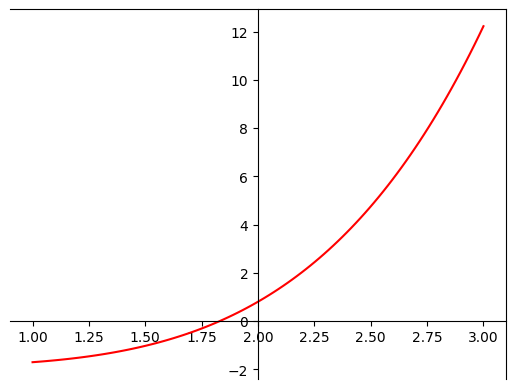

In [80]:
plot_function(1, 3, f3)

In [199]:
def bisection(a, b, f, eps):
    count = 1
    m = (b - a)/2 + a
    val = f(m)
    n = math.ceil(math.log2((b - a)/eps))
    while abs(val) > eps and count < n:
        if f(a)*f(m) < 0:
            b = m
        else:
            a = m
        m = (b - a)/2 + a
        val = f(m)
        count += 1
    return m, count


In [178]:
print(bisection(math.pi*3/2, 2*math.pi, f1, pow(10, -7)))

(4.730040713775952, 24)


In [205]:
def newton(a, b, f, f_d, eps, maks_iter):
    count = 1
    x1 = a
    x2 = b
    while abs(f(x2) - f(x1)) > eps and count < maks_iter:
        x2, x1 = x2 - f(x2)/f_d(x2), x2
        count += 1
    return x2, count


In [150]:
print(newton(math.pi*3/2, 2*math.pi, f1, f1_d, pow(10, -32), 100))

(4.730040744862704, 9)


In [206]:
def secant(a, b, f, eps, maks_iter):
    count = 1
    x1 = a
    x2 = (b - a)/ 2 + a
    while abs(f(x2) - f(x1)) > eps and count < maks_iter:
        x2, x1 = x2 - f(x2)*(x2 - x1)/(f(x2) - f(x1)), x2
        count += 1
    return x2, count


In [156]:
print(secant(math.pi*3/2, 2*math.pi, f1, pow(10, -32), 100))

(4.730040744862704, 8)


In [207]:
def hybrid(a, b, f, eps, maks_iter):
    count = 1
    m = (b - a)/2 + a
    last = a
    val = f(m)
    n = math.ceil(math.log2((b - a)/eps))
    for _ in range(n):
        if f(a)*f(m) < 0:
            b = m
        else:
            a = m
        m, last = (b - a)/2 + a, m
        val = f(m)
        count += 1

    while abs(f(m) - f(last)) > eps and count < maks_iter:
        m, last = m - f(m)*(m - last)/(f(m) - f(last)), m
        count += 1

    return m, count

In [209]:
test_functions = [f1, f2, f3]
derivatives = [f1_d, f2_d, f3_d]
intervals = [(math.pi*3/2, math.pi*2), (0.01, math.pi/2 - 0.01), (1, 3)]
epsilons = [pow(10, -7), pow(10, -15), pow(10, -33)]

f_no = 1
for f, f_d, interval in zip(test_functions, derivatives, intervals):
    for eps in epsilons:
        a, b = interval
        print(f"Funkcja {f_no}, epsilon={eps}")
        print("Bisekcja: ", bisection(a, b, f, eps))
        print("Newton: ", newton(a, b, f, f_d, eps, 1000))
        print("Sekant: ", secant(a, b, f, eps, 1000))
        print("Hybrid: ", hybrid(a, b, f, eps, 1000))
        print("-----------")
    f_no += 1

Funkcja 1, epsilon=1e-07
Bisekcja:  (4.730040713775952, 24)
Newton:  (4.730040744862704, 8)
Sekant:  (4.730040744862704, 7)
Hybrid:  (4.730040744862704, 27)
-----------
Funkcja 1, epsilon=1e-15
Bisekcja:  (4.730040744862705, 51)
Newton:  (4.730040744862704, 9)
Sekant:  (4.730040744862704, 8)
Hybrid:  (4.730040744862704, 53)
-----------
Funkcja 1, epsilon=1e-33
Bisekcja:  (4.730040744862704, 111)
Newton:  (4.730040744862704, 9)
Sekant:  (4.730040744862704, 8)
Hybrid:  (4.730040744862704, 112)
-----------
Funkcja 2, epsilon=1e-07
Bisekcja:  (0.8603335591262582, 24)
Newton:  (0.8603335890193798, 12)
Sekant:  (0.8603335890193831, 6)
Hybrid:  (0.8603335890193796, 26)
-----------
Funkcja 2, epsilon=1e-15
Bisekcja:  (0.8603335890193798, 49)
Newton:  (0.8603335890193797, 13)
Sekant:  (0.8603335890193797, 8)
Hybrid:  (0.8603335890193797, 53)
-----------
Funkcja 2, epsilon=1e-33
Bisekcja:  (0.8603335890193797, 53)
Newton:  (0.8603335890193797, 14)
Sekant:  (0.8603335890193797, 8)
Hybrid:  (0.860